In [ ]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import barrier_options  #import sabr analyticss in another Python file
import black_analytics
reload(barrier_options) #make sure we are using the latest version
reload(black_analytics) 
%matplotlib inline  

In [2]:
k = 100   #strike
t = 1     #time to maturity
h = 130   #barrier
r = 0     #risk free rate
q = 0     #divdend yield
v = 0.2   #implied vol

lower_bound = 10
upper_bound = 130
s = np.arange(lower_bound, upper_bound, 5)

In [3]:
upAndInCall = []
upAndOutCall = []
european = []

for i in range(len(s)):
    upAndInCall.append(barrier_options.up_and_in_call(s[i], k, h, r, q, t, v))    #up and in call with different spot
    upAndOutCall.append(barrier_options.up_and_out_call(s[i], k, h, r, q, t, v))  #up and out call with different spot
    f = s[i] * np.exp((r - q) * t)                              
    european.append(black_analytics.black_option_price(f, k, t, v, 1)) #european call with the same strike

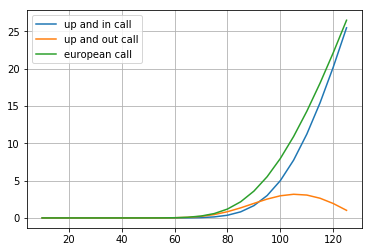

In [4]:
plt1, = plt.plot(s, upAndInCall, label="up and in call")
plt2, = plt.plot(s, upAndOutCall, label="up and out call")
plt3, = plt.plot(s, european, label="european call")

plt.xlabel('spots')
plt.ylabel('prices')
plt.title('u')

plt.legend(handles=[plt1, plt2, plt3])
plt.grid(True)
plt.show()